In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

### data import 

In [2]:
csvFileName = 'UnderlyingOptionsIntervalsCalcs_60sec_2009-03-27.csv'

In [3]:
"""titles = ['underlying_symbol','quote_datetime','root','expiration','strike','option_type','open','high','low','close','trade_volume','bid_size','bid','ask_size','ask','underlying_bid','underlying_ask','implied_underlying_price','active_underlying_price','implied_volatility	delta','gamma','theta','vega','rho']"""

"titles = ['underlying_symbol','quote_datetime','root','expiration','strike','option_type','open','high','low','close','trade_volume','bid_size','bid','ask_size','ask','underlying_bid','underlying_ask','implied_underlying_price','active_underlying_price','implied_volatility\tdelta','gamma','theta','vega','rho']"

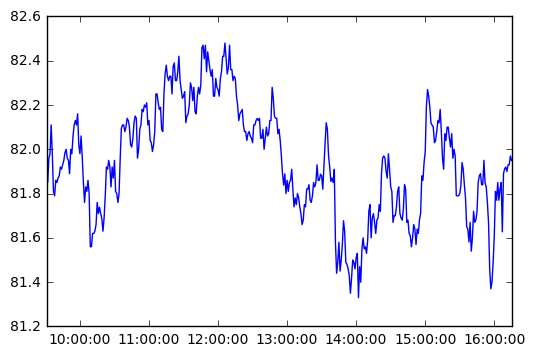

In [ ]:
data = pd.read_csv(csvFileName,sep=',')
data['hash'] = data['root'] + '|' +data['expiration']+'|'+data['strike'].astype(str)+'|'+data['option_type']
#data[['underlying_symbol','root','option_type']].astype(basestring)
data['quote_datetime']= pd.to_datetime(data['quote_datetime'])
data['expiration'] = pd.to_datetime(data['expiration'],format='%Y-%m-%d')
%matplotlib inline
plt.plot(data['quote_datetime'][(data['hash']==data['hash'].get(1))],data['active_underlying_price'][(data['hash']==data['hash'].get(1))])

### puts options into a hash function 

In [ ]:

optionD = {} 
for index, row in data.iterrows(): 
    if not row['hash'] in optionD:
        stack = []
        stack.append(row)
        optionD[row['hash']]=stack
        
    else:
        stack = optionD[row['hash']]
        stack.append(row)


In [ ]:
data.sort_values(["expiration"],ascending=[True])

In [ ]:
#[data["bid"]>0]
print data[data["expiration"]=="2009-03-27"]['hash']

In [ ]:
#generate time seris 
def getTimeSeries(pdRowList,yValue):
    time = []
    price = []
    for item in pdRowList:
        time.append(item['quote_datetime'])
        price.append(item[yValue])
    return {'time':time,'y':price} 

In [ ]:
#uses the get Time series function to get the time and plot it versus the datetime 
ts = getTimeSeries(optionD["JBG|2009-03-31|145.0|C"],'theta')
t = ts['time']
y = ts['y']
plt.plot(t,y)

In [ ]:
#this just plots a lot of things. It doesn't work that well 
i = 0 
for key in optionD: 
    i = i + 1 
    ts = getTimeSeries(optionD[key],'theta')
    t = ts['time']
    y = ts['y']
    if((i%37==0) and (optionD[key][1]['option_type'] =="C") and (optionD[key][1]['bid']>0)):
        plt.plot(t,y) 